In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
def imshow(image, title=None, size=100):
    assert image is not None, 'Not Provided'
    plt.imshow(image, 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [9]:
image = cv2.imread('./../newImages/Fig0309(a)(washed_out_aerial_image).tif',0 )

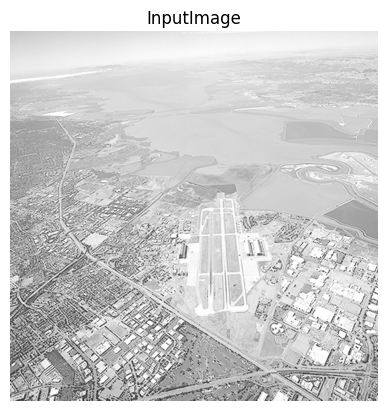

In [10]:
imshow(image, 'InputImage')

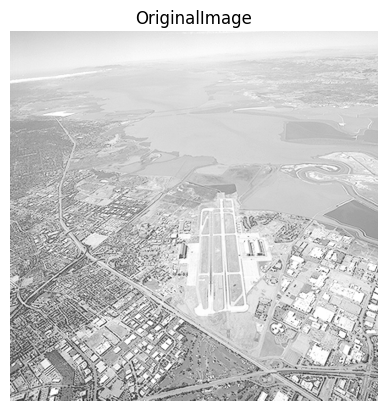

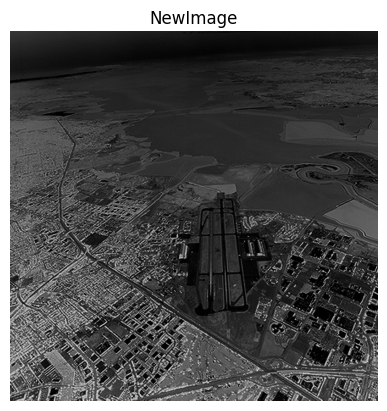

In [11]:
negativeImage = 255 - image
imshow(image , 'OriginalImage')
imshow(negativeImage , 'NewImage')

In [12]:
image.shape

(769, 765)

In [13]:
negativeImage.shape

(769, 765)

In [14]:
image = cv2.imread("./../newImages/Fig0309(a)(washed_out_aerial_image).tif",0)

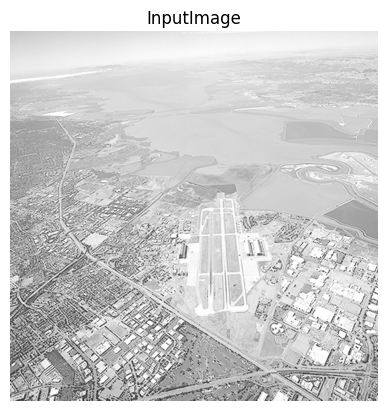

In [15]:
imshow(image , 'InputImage')

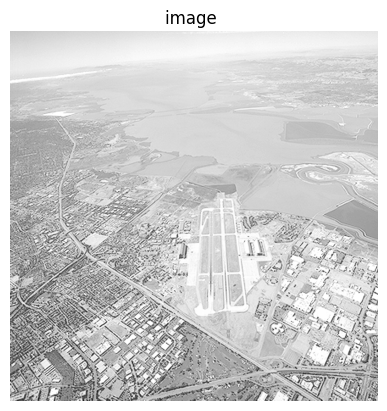

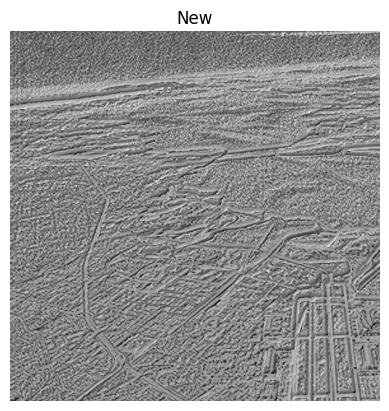

In [16]:
# 1. Image reading:
image = cv2.imread('./../newImages/Fig0309(a)(washed_out_aerial_image).tif', 0)

# 2. Output initialization:
result = np.zeros((512,512))

# 3. Global statistics calculation:
gmean = np.mean(image)

# 4. Gain factor constant:
k = 1

# 5. Pixel processing loop:
for i in range(512):
    for j in range(512):

# 6. Local region extraction:
        region = image[i:i+5 , j: j+5]

    # 7. Local statistics calculation:
        smean = np.mean(region)
        stdRegion = np.std(region)

#         8. Local gain factor calculation:
        lgf = (k*gmean)/stdRegion

#     9. Output pixel value calculation:
        result[i,j] = (lgf *(image[i,j]-smean)+smean)
imshow(image , 'image ')
imshow(result, 'New')


        
        


In [17]:
image.shape

(769, 765)

In [18]:
s = [2,2]
ourImage = np.zeros((512,512))
s+ourImage

ValueError: operands could not be broadcast together with shapes (2,) (512,512) 

In [ ]:
def show(image, title=None):
    plt.imshow(image, 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
image = cv2.imread("./../newImages/dollar.tif")
imshow(image  , "DollarImage")

In [22]:
bit8info = image.copy()*0
bit7info = image.copy()*0
bit6info = image.copy()*0
bit5info = image.copy()*0
for i in range(512):
    for j in range(765):
        if  image[i,j] >127 and image[i , j]<=225:
            bit8info[i,j] = image[i,j]
        elif image[i,j] >63 and image[i,j]<=127:
            bit7info[i,j] = image[i,j]
        elif image[i,j] >31 and image[i,j]<=63:
            bit6info[i,j] = image[i,j]
        elif image[i,j] >15 and image[i,j]<=31:
            bit5info[i,j] = image[i,j]
# bit8info.shape, image.shape    

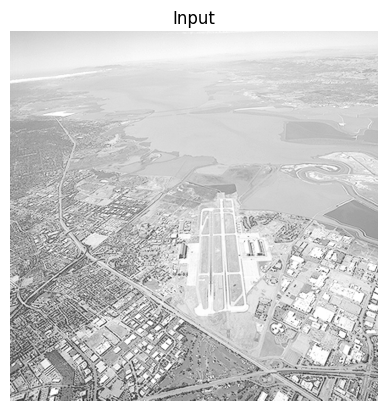

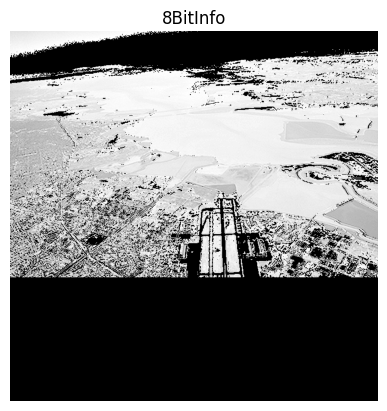

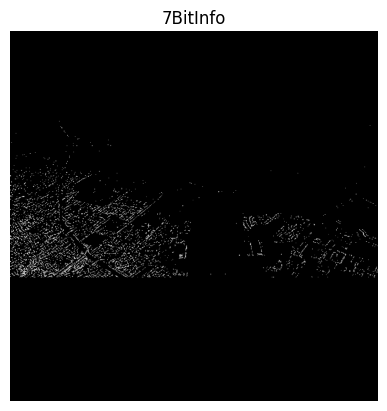

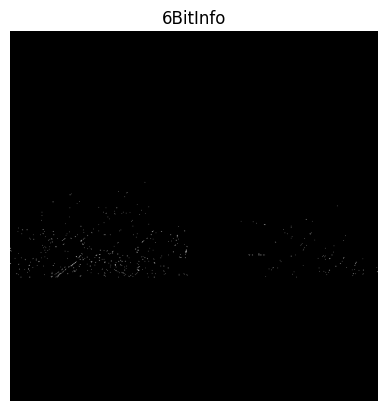

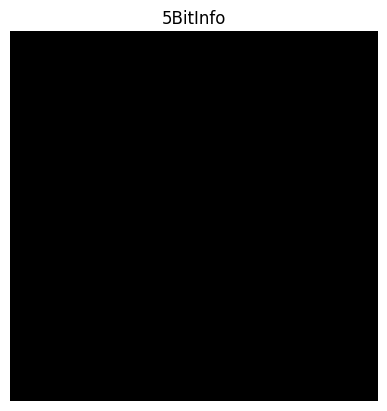

In [21]:
imshow(image, 'Input')
imshow(bit8info, '8BitInfo')
imshow(bit7info, '7BitInfo')
imshow(bit6info, '6BitInfo')
imshow(bit5info, '5BitInfo')

# bit slicing


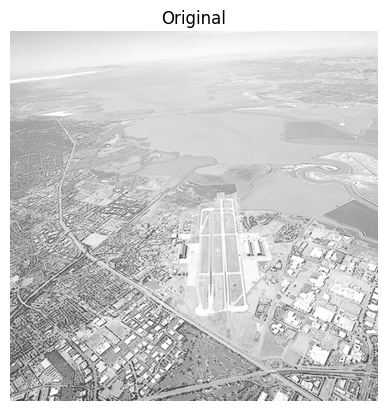

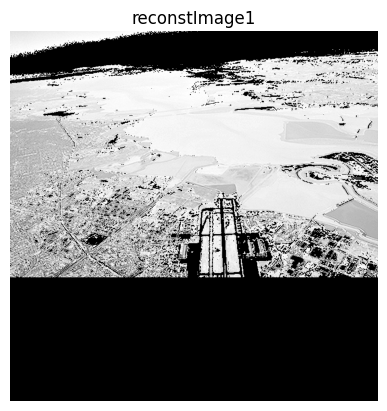

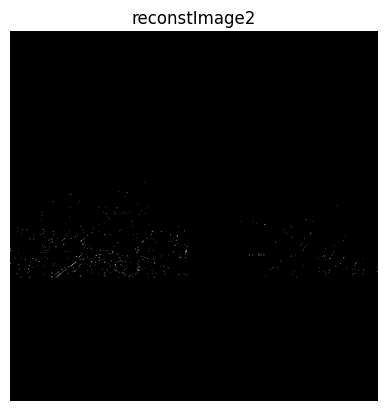

In [24]:
imshow(image , "Original")
reconstImage1 = bit8info + bit7info
imshow(reconstImage1 , "reconstImage1")

reconstImage2 = bit6info + bit5info
imshow(reconstImage2 , "reconstImage2")


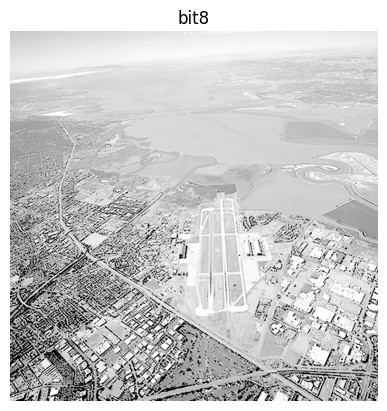

In [25]:
bit8info = np.where(image>127 , image , 0)
imshow(bit8info , "bit8")

# Smoothing (low Pass filtering) (blurring)
    Noise Remove
### Sharpening (high pass filtering) (edges)

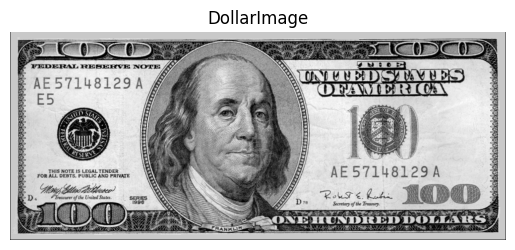

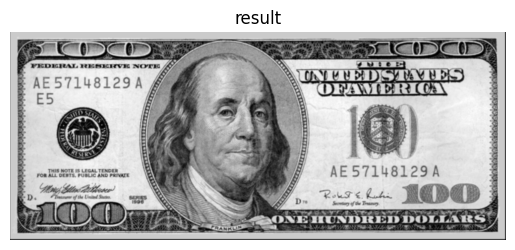

In [38]:
# averaging 

image = cv2.imread("./../newImages/dollar.tif",0)
imshow(image , 'DollarImage')
one = np.ones((3,3))
result =np.zeros((image.shape[0],image.shape[1]))
for i in range(image.shape[0]-1):
    for j in range(image.shape[1]-1):
        result[i,j] = image[i:i+3 , j:j+3].mean()
imshow(result , 'result')        


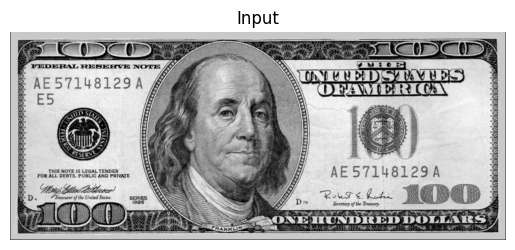

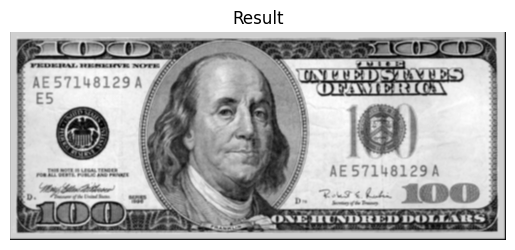

In [41]:
#averaging
image = cv2.imread('./../newImages/dollar.tif',0)
imshow(image, 'Input')
result2 = np.zeros((image.shape[0], image.shape[1]))

for i in range(image.shape[0]-2):
    for j in range(image.shape[1]-2):
        result2[i,j] =image[i:i+5, j:j+5].mean()
        
imshow(result2, 'Result')

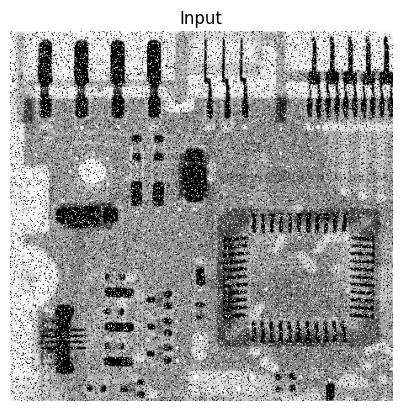

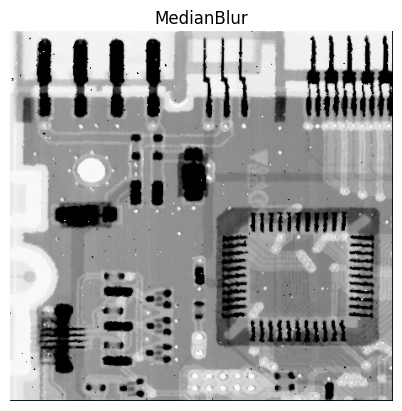

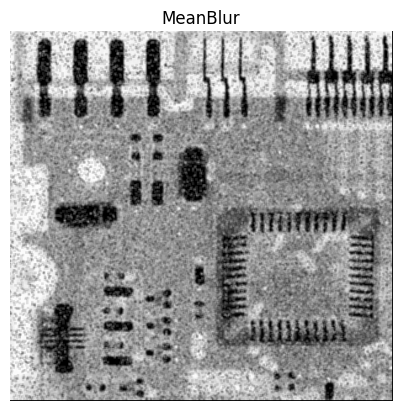

In [43]:
image = cv2.imread('./../newImages/circuit.tif',0)
imshow(image, 'Input')
resultm = np.zeros((image.shape[0], image.shape[1]))
resultmean = np.zeros((image.shape[0], image.shape[1]))
for i in range(image.shape[0]-1):
    for j in range(image.shape[1]-1):
        resultm[i,j] =np.median(image[i:i+3, j:j+3])
        resultmean[i,j] =np.mean(image[i:i+3, j:j+3])
imshow(resultm, 'MedianBlur')
imshow(resultmean, 'MeanBlur')

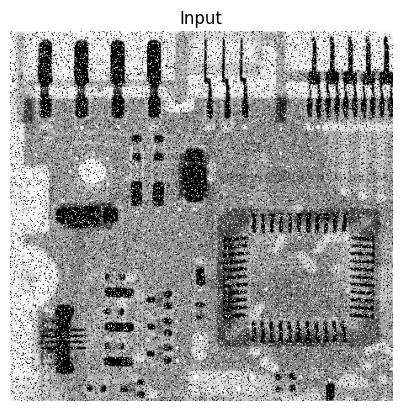

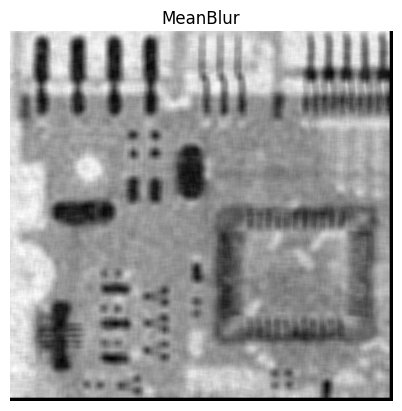

In [45]:
image = cv2.imread('./../newImages/circuit.tif',cv2.IMREAD_GRAYSCALE)
imshow(image, 'Input')
resultmean = np.zeros((image.shape[0], image.shape[1]))
for i in range(image.shape[0]-4):
    for j in range(image.shape[1]-4):
        resultmean[i,j] =np.mean(image[i:i+9, j:j+9])
imshow(resultmean, 'MeanBlur')

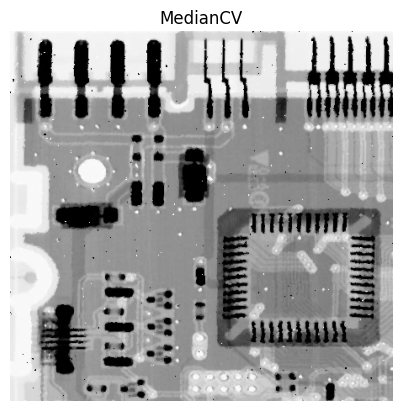

In [47]:
resultMedian = cv2.medianBlur(image, 3)
imshow(resultMedian, 'MedianCV')

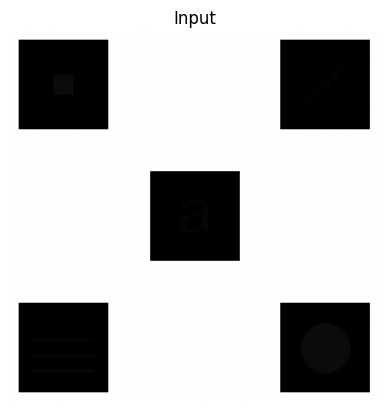

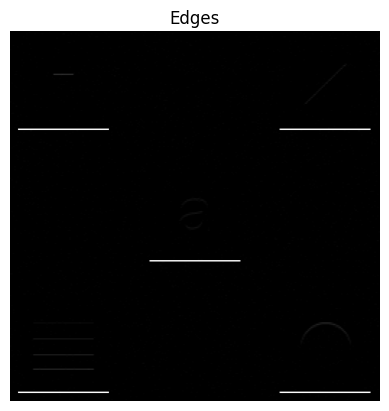

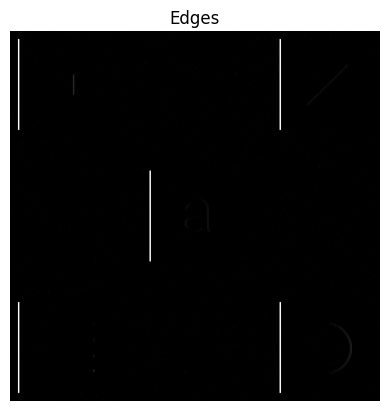

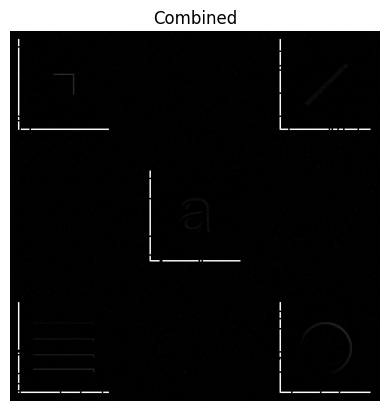

In [48]:
image = cv2.imread('./../newImages/Fig0326(a)(embedded_square_noisy_512).tif', 0)
ker = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])
ker2 = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])
edges = cv2.filter2D(image, -1,ker)
edges2 = cv2.filter2D(image, -1,ker2)
imshow(image, 'Input')
imshow(edges, 'Edges')
imshow(edges2, 'Edges')
imshow(edges+edges2, 'Combined')

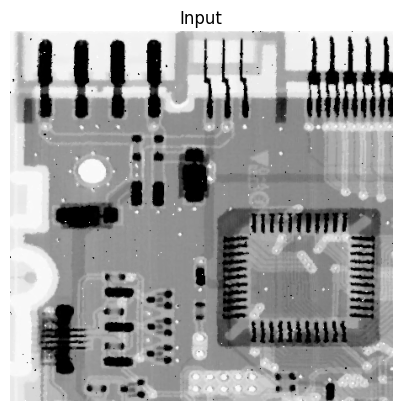

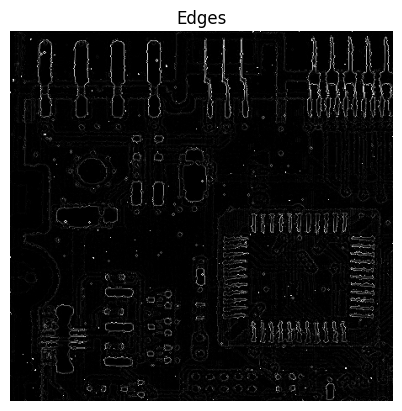

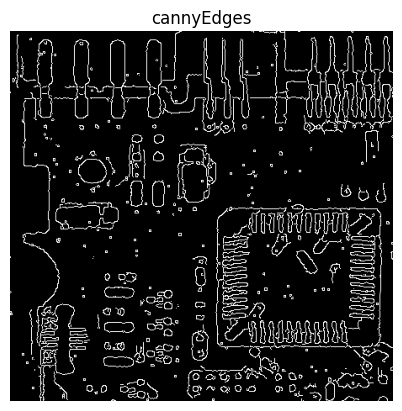

In [50]:
image = cv2.imread('./../newImages/circuit.tif', 0)
image = cv2.medianBlur(image, 3)
ker = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])
edges = cv2.filter2D(image, -1, ker)
cannyEdges = cv2.Canny(image,100,255)
imshow(image, 'Input')
imshow(edges, 'Edges')
imshow(cannyEdges, 'cannyEdges')